# Exploration of Genomic mutation Dataset

Here, I perform initial exploration of the mutation dataset.
Inspect
* structure
* column meanings
* missing data
* statistics



In [82]:
# Standard libraries
import pandas as pd
import numpy as np
import os

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
# Display more rows and columns
pd.set_option("display.max_rows", 400)
pd.set_option("display.max_columns", 600)
pd.set_option("display.width", 1000)

# Optional: Plot styling
sns.set(style="whitegrid")

In [83]:
# Path to your data
file_path = "../data/raw/data_mutations.txt"

# Read the file
df = pd.read_csv(file_path, sep="\t", comment="#", low_memory=False)

In [84]:
# Preview
df.head(10)

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,dbSNP_RS,dbSNP_Val_Status,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode,Match_Norm_Seq_Allele1,Match_Norm_Seq_Allele2,Tumor_Validation_Allele1,Tumor_Validation_Allele2,Match_Norm_Validation_Allele1,Match_Norm_Validation_Allele2,Verification_Status,Validation_Status,Mutation_Status,Sequencing_Phase,Sequence_Source,Validation_Method,Score,BAM_File,Sequencer,t_ref_count,t_alt_count,n_ref_count,n_alt_count,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,RefSeq,Protein_position,Codons,Exon_Number,1000G_AF,1000G_AFR_AF,1000G_AMR_AF,1000G_EAS_AF,1000G_EUR_AF,1000G_SAS_AF,APPRIS,Allele,Amino_acids,BIOTYPE,CANONICAL,CCDS,CDS_position,CLIN_SIG,CONTEXT,COSMIC,DISTANCE,DOMAINS,ENSP,ESP_AA_AF,ESP_EA_AF,EXON,Existing_variation,FLAGS,Feature,Feature_type,GDC_FILTER,GENE_PHENO,Gene,HGNC_ID,HGVS_OFFSET,HIGH_INF_POS,IMPACT,INTRON,MANE,MAX_AF,MAX_AF_POPS,MOTIF_NAME,MOTIF_POS,MOTIF_SCORE_CHANGE,One_Consequence,PHENO,PICK,PUBMED,PolyPhen,RNA_Support,RNA_alt_count,RNA_depth,RNA_ref_count,SIFT,SOMATIC,SWISSPROT,SYMBOL,SYMBOL_SOURCE,TRANSCRIPTION_FACTORS,TRANSCRIPT_STRAND,TREMBL,TSL,UNIPARC,UNIPROT_ISOFORM,VARIANT_CLASS,all_effects,cDNA_position,callers,case_id,genomic_location_explanation,gnomAD_AF,gnomAD_AFR_AF,gnomAD_AMR_AF,gnomAD_ASJ_AF,gnomAD_EAS_AF,gnomAD_FIN_AF,gnomAD_NFE_AF,gnomAD_OTH_AF,gnomAD_SAS_AF,gnomAD_non_cancer_AF,gnomAD_non_cancer_AFR_AF,gnomAD_non_cancer_AMI_AF,gnomAD_non_cancer_AMR_AF,gnomAD_non_cancer_ASJ_AF,gnomAD_non_cancer_EAS_AF,gnomAD_non_cancer_FIN_AF,gnomAD_non_cancer_MAX_AF_POPS_adj,gnomAD_non_cancer_MAX_AF_adj,gnomAD_non_cancer_MID_AF,gnomAD_non_cancer_NFE_AF,gnomAD_non_cancer_OTH_AF,gnomAD_non_cancer_SAS_AF,hotspot,miRNA,n_depth,normal_bam_uuid,t_depth,tumor_bam_uuid,Annotation_Status
0,MTCL1,23255,BI,GRCh38,18,8806948,8806948,+,missense_variant,Missense_Mutation,SNP,G,G,A,rs199934266,NaN,TCGA-AB-2881-03A,TCGA-AB-2881-11A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somatic,NaN,NaN,NaN,NaN,NaN,NaN,26,6,NaN,NaN,ENST00000306329.15:c.3449G>A,p.Arg1150His,p.R1150H,ENST00000306329,NM_001378206.1,1150,cGt/cAt,9/14,NaN,NaN,NaN,NaN,NaN,NaN,P3,A,R/H,protein_coding,YES,NaN,3449/5718,NaN,CTTCCGTGCGG,COSM1318381,NaN,Coiled-coils_(Ncoils):Coil;PANTHER:PTHR15742;P...,ENSP00000305027,0.000000,0.000116,9/14,rs199934266,NaN,ENST00000306329,Transcript,NaN,NaN,ENSG00000168502,HGNC:29121,NaN,NaN,MODERATE,NaN,NaN,0.000124,gnomAD_NFE,NaN,NaN,NaN,missense_variant,NaN,1.0,NaN,benign(0.045),Unknown,NaN,NaN,NaN,tolerated(0.16),NaN,Q9Y4B5.139,MTCL1,HGNC,NaN,1,NaN,5.0,UPI0001AE65C5,Q9Y4B5-1,SNV,"MTCL1,missense_variant,p.R831H,ENST00000359865...",3449/5718,mutect2;varscan2,fff35c80-88cd-4923-80c1-0273ba5bed0f,NaN,0.000072,0.000000,0.000029,0.000000,0.000000,0.000095,0.000124,0.000000,0.000033,0.000047,0.000000,0.0,0.000000,0.0,0.000000,0.000000,nfe,0.000108,0.0,0.000108,0.0,0.000000,0,NaN,39,ae212e50-9fb6-47c6-b334-836962553043,32,d1373e1b-d60d-405d-aeb4-ae045f03e331,SUCCESS
1,HSH2D,84941,BI,GRCh38,19,16157257,16157257,+,inframe_insertion,In_Frame_Ins,INS,G,G,CTCC,novel,NaN,TCGA-AB-2881-03A,TCGA-AB-2881-11A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somatic,NaN,NaN,NaN,NaN,NaN,NaN,89,9,NaN,NaN,ENST00000613986.4:c.522delinsCTCC,p.Ser175dup,p.S175dup,ENST00000613986,NM_001352265.2,175,ccG/ccCTCC,6/6,NaN,NaN,NaN,NaN,NaN,NaN,P1,CTCC,P/PS,protein_coding,NaN,CCDS74304.1,522/1059,NaN,AAGCCGTCAGC,NaN,NaN,PANTHER:PTHR14388;PANTHER:PTHR14388:SF3;MobiDB...,ENSP00000483354,NaN,NaN,6/6,NaN,NaN,ENST00000613986,Transcript,NaN,NaN,ENSG00000196684,HGNC:24920,NaN,NaN,MODERATE,NaN,NM_001382417.1,NaN,NaN,NaN,NaN,NaN,inframe_insertion,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,Q96JZ2.142,HSH2D,HGNC,NaN,1,NaN,2.0,UPI0000073F82,Q96JZ2-1,indel,"HSH2D,inframe_insertion,p.S175dup,ENST00000616...",639/1957,pindel;varscan2*,fff35c80-88cd-4923-80c1-0273ba5bed0f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [85]:
print("shape", df.shape)
print("\nColumns:")
print(df.columns.tolist())

shape (569, 140)

Columns:
['Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build', 'Chromosome', 'Start_Position', 'End_Position', 'Strand', 'Consequence', 'Variant_Classification', 'Variant_Type', 'Reference_Allele', 'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'dbSNP_RS', 'dbSNP_Val_Status', 'Tumor_Sample_Barcode', 'Matched_Norm_Sample_Barcode', 'Match_Norm_Seq_Allele1', 'Match_Norm_Seq_Allele2', 'Tumor_Validation_Allele1', 'Tumor_Validation_Allele2', 'Match_Norm_Validation_Allele1', 'Match_Norm_Validation_Allele2', 'Verification_Status', 'Validation_Status', 'Mutation_Status', 'Sequencing_Phase', 'Sequence_Source', 'Validation_Method', 'Score', 'BAM_File', 'Sequencer', 't_ref_count', 't_alt_count', 'n_ref_count', 'n_alt_count', 'HGVSc', 'HGVSp', 'HGVSp_Short', 'Transcript_ID', 'RefSeq', 'Protein_position', 'Codons', 'Exon_Number', '1000G_AF', '1000G_AFR_AF', '1000G_AMR_AF', '1000G_EAS_AF', '1000G_EUR_AF', '1000G_SAS_AF', 'APPRIS', 'Allele', 'Amino_acids', 'BIOTYPE', 'CANONICAL', 'CCD

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Columns: 140 entries, Hugo_Symbol to Annotation_Status
dtypes: float64(62), int64(9), object(69)
memory usage: 622.5+ KB


In [87]:
missing_values = df.isna().mean().sort_values(ascending=False)
missing_values.head(20)

genomic_location_explanation     1.0
TRANSCRIPTION_FACTORS            1.0
n_ref_count                      1.0
Sequencer                        1.0
BAM_File                         1.0
Score                            1.0
Validation_Method                1.0
Sequence_Source                  1.0
Sequencing_Phase                 1.0
Validation_Status                1.0
Verification_Status              1.0
Match_Norm_Validation_Allele2    1.0
Match_Norm_Validation_Allele1    1.0
Tumor_Validation_Allele2         1.0
Tumor_Validation_Allele1         1.0
Match_Norm_Seq_Allele2           1.0
Match_Norm_Seq_Allele1           1.0
MOTIF_NAME                       1.0
MOTIF_POS                        1.0
RNA_ref_count                    1.0
dtype: float64

In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Entrez_Gene_Id,569.0,6.051419e+05,7.505472e+06,43.000000,4.869000e+03,2.299900e+04,8.000500e+04,1.097291e+08
Start_Position,569.0,7.621491e+07,5.598350e+07,900111.000000,3.287844e+07,6.173562e+07,1.168521e+08,2.485930e+08
End_Position,569.0,7.621491e+07,5.598350e+07,900111.000000,3.287844e+07,6.173562e+07,1.168521e+08,2.485930e+08
dbSNP_Val_Status,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Match_Norm_Seq_Allele1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Match_Norm_Seq_Allele2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tumor_Validation_Allele1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tumor_Validation_Allele2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Match_Norm_Validation_Allele1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Match_Norm_Validation_Allele2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
unknown_columns = ['HGVSp', 'Allele', 'One_Consequence', 'PolyPhen', 'SIFT', 'SOMATIC', 'VARIANT_CLASS']
for col in unknown_columns:
    if col in df.columns:
        print(f"\nColumn: {col}")
        print(df[col].head(5))


Column: HGVSp
0    p.Arg1150His
1     p.Ser175dup
2     p.Val588Met
3      p.Ser72Pro
4     p.Arg882His
Name: HGVSp, dtype: object

Column: Allele
0       A
1    CTCC
2       A
3       G
4       T
Name: Allele, dtype: object

Column: One_Consequence
0     missense_variant
1    inframe_insertion
2     missense_variant
3     missense_variant
4     missense_variant
Name: One_Consequence, dtype: object

Column: PolyPhen
0    benign(0.045)
1              NaN
2    benign(0.051)
3    benign(0.006)
4    benign(0.067)
Name: PolyPhen, dtype: object

Column: SIFT
0    tolerated(0.16)
1                NaN
2    tolerated(0.23)
3    tolerated(0.11)
4     deleterious(0)
Name: SIFT, dtype: object

Column: SOMATIC
0        NaN
1        NaN
2        0;1
3        0;1
4    0;1;1;1
Name: SOMATIC, dtype: object

Column: VARIANT_CLASS
0      SNV
1    indel
2      SNV
3      SNV
4      SNV
Name: VARIANT_CLASS, dtype: object


In [94]:
# Figure out alleles and their corresponding gene
gene_and_allele = df[['Hugo_Symbol','Allele']]
print(gene_and_allele.head(10))

  Hugo_Symbol Allele
0       MTCL1      A
1       HSH2D   CTCC
2      PRDM16      A
3       DCAF8      G
4      DNMT3A      T
5      CLASP2      T
6      SH3TC2      T
7      ATP10B      C
8       DOCK2      A
9        NPM1   TCTG


## Interesting 
* HGVSp_Short: 
* Allele
* One_Consequence
* PolyPhen
* SIFT
* SOMATIC
* VARIANT_CLASS
* VARIANT_CLASSIFICATION

### Key Columns Used in This Analysis



- **Hugo_Symbol:** which gene is affected by a mutation.
  The official gene name (from the HUGO Gene Nomenclature Committee).  
  *Example*: `TP53`, `NPM1`, `DNMT3A`.  
  

- **Variant_Classification:**  what kind of mutation is it.
  The type of mutation in terms of its biological effect.  
  *Examples*:  
  - `Missense_Mutation` → amino acid change  
  - `Silent` → no change to the protein  
  - `Nonsense_Mutation` → introduces a stop codon  
  - `Frame_Shift_Ins/Del` → disrupts protein reading frame  
  - `Splice_Site` → alters RNA splicing  
  

- **Tumor_Sample_Barcode:**  mutation to an individual patient and the mutation burden.
  A unique identifier for each tumor sample (patient).  
  *Example*: `TCGA-AB-2935-03A`.  
  

- **t_ref_count**  
  Number of sequencing reads supporting the **reference (normal)** allele in the tumor sample.  
  *Example*: `63` means 63 reads match the reference base.

- **t_alt_count**  
  Number of sequencing reads supporting the **alternate (mutated)** allele in the tumor sample.  
  *Example*: `45` means 45 reads match the mutation.  


### Summary of mutation

- Total rows: 569
- Unique tumor samples: 72

**Top mutated genes:**
- NPM1, TP53, DNMT3A, IDH2, and FLT3 appear most frequently, consistent with known cancer drivers.

**Mutation classes:**
- Missense mutations dominate (365), followed by silent mutations (110).
- Frameshift and nonsense mutations occur less frequently but often have higher impact.

**Mutations per sample:**
- Some patients have >30 mutations, others fewer than 10.
- This suggests heterogeneity in mutational burden.




In [91]:
key_columns = ["Hugo_Symbol", "Variant_Classification",  "t_ref_count", "t_alt_count", 'hotspot']
df_key = df[key_columns]
print(df_key.head(10))

  Hugo_Symbol Variant_Classification  t_ref_count  t_alt_count  hotspot
0       MTCL1      Missense_Mutation           26            6        0
1       HSH2D           In_Frame_Ins           89            9        0
2      PRDM16      Missense_Mutation           25           35        0
3       DCAF8      Missense_Mutation           44           35        0
4      DNMT3A      Missense_Mutation           63           45        0
5      CLASP2        Frame_Shift_Ins          144           90        0
6      SH3TC2      Missense_Mutation          146           38        0
7      ATP10B      Missense_Mutation           52           44        0
8       DOCK2            Splice_Site           66           66        0
9        NPM1        Frame_Shift_Ins           48           29        0


In [92]:
# Explore mutation-related columns
if 'Variant_Classification' in df.columns:
    print("Top mutation classifications:")
    print(df['Variant_Classification'].value_counts().head(10))

if 'Hugo_Symbol' in df.columns:
    print("\nTop mutated genes:")
    print(df['Hugo_Symbol'].value_counts().head(10))


Top mutation classifications:
Variant_Classification
Missense_Mutation    365
Silent               110
Frame_Shift_Ins       30
Nonsense_Mutation     22
Splice_Site           13
Frame_Shift_Del        9
Splice_Region          6
In_Frame_Ins           4
Intron                 4
5'Flank                2
Name: count, dtype: int64

Top mutated genes:
Hugo_Symbol
NPM1      8
TP53      7
DNMT3A    6
IDH2      5
RUNX1     4
TTN       3
GOLGA4    3
FLT3      3
FREM2     3
KRAS      3
Name: count, dtype: int64


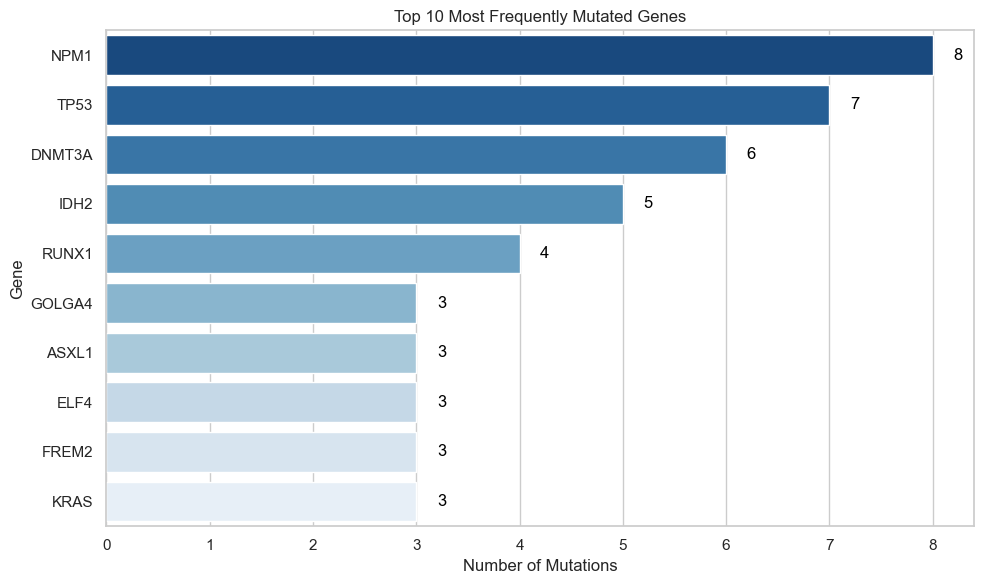

In [109]:
os.makedirs("results", exist_ok=True)
top_genes = (
    df.groupby('Hugo_Symbol')
      .size()
      .reset_index(name='Mutation_Count')
      .sort_values(by='Mutation_Count', ascending=False)
      .head(10)
      .rename(columns={'Hugo_Symbol': 'Gene'})
)

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=top_genes,
    x="Mutation_Count",
    y="Gene",
    hue = "Gene",

    palette="Blues_r"
)


for i, v in enumerate(top_genes["Mutation_Count"]):
    ax.text(v + 0.2, i, str(v), color="black", va="center")

plt.xlabel("Number of Mutations")
plt.ylabel("Gene")
plt.title("Top 10 Most Frequently Mutated Genes")
plt.tight_layout()


plt.savefig("results/top10_mutated_genes.png", dpi=300)

plt.show()

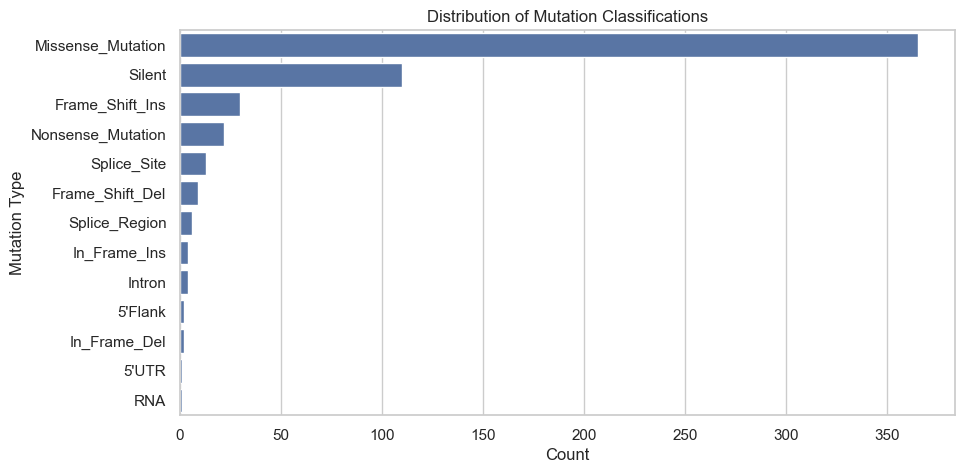

In [ ]:
#Visual exploration
plt.figure(figsize=(10,5))
sns.countplot(y='Variant_Classification', data=df, 
              order=df['Variant_Classification'].value_counts().index)
plt.title("Distribution of Mutation Classifications")
plt.xlabel("Count")
plt.ylabel("Mutation Type")
plt.show()
